# Understanding personal protective behaviours and opportunities for interventions:
## Results from a multi-method investigation of cross-sectional data
#### Kaisa Sauro, James Twose, Gjalt-Jorn Peters, Matti Heino & Nelli Hankonen

## Demographics

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import session_info

import pingouin as pg

In [2]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

### Virtual Environments and Packages

In [3]:
session_info.show(write_req_file=False) #add write_req_file=True to function to get requirements.txt file of packages used

### Read in data, show info and data head

In [4]:
df = pd.read_csv("data/shield_gjames_21-09-20_prepped.csv").drop("Unnamed: 0", axis=1)
display(df.head())
sdt_columns = df.filter(regex="sdt").columns.tolist()
drop_sdt = True
if drop_sdt:
    df=df.drop(sdt_columns, axis=1)
df.shape

,id,sampling_weight,demographic_gender,demographic_age,demographic_4_areas,demographic_8_areas,demographic_higher_education,behaviour_indoors_nonhouseholders,behaviour_close_contact,behaviour_quarantined,...,intention_public_transport_recoded,intention_indoor_meeting_recoded,intention_restaurant_recoded,intention_pa_recoded,intention_composite,behaviour_indoors_nonhouseholders_recoded,behaviour_unmasked_recoded,behavior_composite,behavior_composite_recoded,intention_behavior_composite
0,1,2.060959,2,60+,2,7,0,2,5,2,...,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
1,2,1.784139,2,40-49,1,1,1,3,3,2,...,0,1,1,1,3,0.785714,0.214286,0.168367,0.841837,1.920918
2,3,1.204000,1,60+,1,2,1,4,4,2,...,0,0,0,0,0,0.500000,0.214286,0.107143,0.535714,0.267857
3,4,2.232220,1,60+,2,6,0,4,3,2,...,0,2,0,2,4,0.500000,0.500000,0.250000,1.250000,2.625000
4,5,1.627940,2,18-29,1,3,0,6,3,2,...,0,2,0,0,2,0.000000,0.214286,0.000000,0.000000,1.000000


(2272, 87)

### Specify the feature list, grouping variable, and specify the grouping variable as a categorical variable

In [5]:
target = "intention_behavior_composite"
df[target] = (df[target] - 10) * -1

In [6]:
features_list = df.filter(regex="^automaticity|attitude|^norms|^risk|^effective").columns.tolist()
meta_columns = ['Original position', 'Variable name', 'Label',
       'Item english translation ', 'Label short', 'Type', 'New variable name',
       'variable name helper',
       'Of primary interest as a predictor (i.e. feature)?', 'English lo-anchor',
       'English hi-anchor']

sheet_id = "1BEX4W8XRGnuDk4Asa_pdKij3EIZBvhSPqHxFrDjM07k"
sheet_name = "Variable_names"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
meta_df = pd.read_csv(url).loc[:, meta_columns]
meta_list = df.filter(regex="^automaticity|attitude|^norms|^risk|^effective|^behaviour|^intention").columns.tolist()

In [7]:
pd.set_option("display.max_colwidth", 350)
pd.set_option('display.expand_frame_repr', True)
meta_df.loc[meta_df["New variable name"].isin(meta_list), ["Item english translation ", "Label short", "New variable name"]] #use Label Short instead of Item english translation for relabelling the axes

,Item english translation,Label short,New variable name
12,"How often in the last 7 days have you been indoors with people outside your household so that it is not related to obligations? For example, meeting friends, visiting hobbies, non-essential shopping, or other activities that are not required for your work or other duties.\n",Being indoors with people outside household,behaviour_indoors_nonhouseholders
13,"In the last 7 days, have you been in close contact with people outside your household? Direct contact means spending more than one minute less than two meters away from another person or touching (e.g., shaking hands) outdoors or indoors.",Close contact,behaviour_close_contact
14,"Are you currently in quarantine or isolation due to an official instruction or order? (For example, because you are waiting for a corona test, have returned from abroad or been exposed to a coronavirus)",Quarantine or isolation,behaviour_quarantined
15,How often in the last 7 days were you in your free time without a mask indoors with people you don’t live with?,Without a mask indoors with people outside household,behaviour_unmasked
24,"If in the next 7 days you go to visit the following indoor spaces and there are people outside your household, Are you going to wear a mask? Grocery store or other store\n",Intention to wear a mask grocery store or other store,intention_store
25,"If in the next 7 days you go to visit the following indoor spaces and there are people outside your household, Are you going to wear a mask? Bus, train or other means of public transport",Intention to wear a mask public transport,intention_public_transport
26,"If in the next 7 days you go to visit the following indoor spaces and there are people outside your household, Are you going to wear a mask? Meeting people outside your household indoors",Intention to wear a mask meeting people outside indoors,intention_indoor_meeting
27,"If in the next 7 days you go to visit the following indoor spaces and there are people outside your household, Are you going to wear a mask? Cafe, restaurant or bar indoors","Intention to wear a mask cafe, restaurant or bar",intention_restaurant
28,"If in the next 7 days you go to visit the following indoor spaces and there are people outside your household, Are you going to wear a mask? Indoor exercise",Intention to wear a mask indoor exercise,intention_pa
29,"Taking a mask with you to a store or public transport, for example, has already become automatic for some and is done without thinking. For others, taking a mask with them is not automatic at all, but requires conscious thinking and effort.",Is taking a mask with you automatic for you?,automaticity_carry_mask


In [8]:
pd.set_option("display.max_colwidth", 100)

## EDA on the target
Check the amount of samples in the target

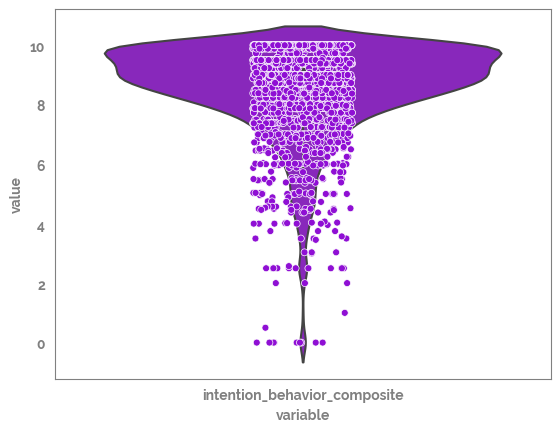

In [9]:
_ = sns.violinplot(data=df[[target]].melt(), 
                    x="variable", 
                    y="value"
               )
_ = sns.stripplot(data=df[[target]].melt(), 
                    x="variable", 
                    y="value",
                  edgecolor='white',
                  linewidth=0.5
               )

In [10]:
pd.crosstab(df["demographic_gender"], df["demographic_age"])

demographic_age,18-29,30-39,40-49,50-59,60+
demographic_gender,,,,,
1,114,169,187,168,337
2,281,185,229,211,391


In [11]:
target_df = df[target]
target_df.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
intention_behavior_composite,2272.0,8.582428,1.524704,-0.0,8.017857,8.964286,9.5,10.0


In [12]:
df.filter(regex="demo").apply(lambda col: col.unique())

demographic_gender                                         [2, 1]
demographic_age                 [60+, 40-49, 18-29, 50-59, 30-39]
demographic_4_areas                                  [2, 1, 4, 3]
demographic_8_areas                      [7, 1, 2, 6, 3, 8, 5, 4]
demographic_higher_education                               [0, 1]
demographic_risk_group                                  [1, 2, 3]
dtype: object

In [13]:
gender_cat = CategoricalDtype(categories=["Man", "Woman"], ordered=False)
age_cat = CategoricalDtype(categories=["18-29", "30-39", "40-49", "50-59", "60+"], ordered=True)
higher_education_boolean_cat = CategoricalDtype(categories=["Lower", "Higher"], ordered=True)
risk_group_cat = CategoricalDtype(categories=["Low", "Medium", "High"], ordered=True)

In [14]:
df = df.assign(**{"gender": lambda d: d["demographic_gender"].replace({1: "Man", 2: "Woman"}).astype(gender_cat),
             "education": lambda d: d["demographic_higher_education"].replace({0: "Lower", 1: "Higher"}).astype(higher_education_boolean_cat),
             "age": lambda d: d["demographic_age"].astype(age_cat),
             "risk_group": lambda d: d["demographic_risk_group"].replace({1: "Low", 2: "Medium", 3: "High"}).astype(risk_group_cat)})

In [15]:
demographics_list = ["gender", "education", "age", "risk_group"]
demos_df = pd.concat([df[x].value_counts().sort_values().to_frame(name=f"{x}_amount").reset_index().rename(columns={"index": x}) for x in demographics_list], axis=1)

In [16]:
amount_cols = ["age_amount", "gender_amount", "risk_group_amount"]

In [17]:
pd.set_option("styler.format.precision", 0)
demos_df.style.bar(subset=amount_cols,
            align='mid', 
            color=['#d65f5f', '#5fba7d']).format(na_rep="")

,gender,gender_amount,education,education_amount,age,age_amount,risk_group,risk_group_amount
0,Man,975,Higher,1053,30-39,354,High,131
1,Woman,1297,Lower,1219,50-59,379,Low,714
2,,,,,18-29,395,Medium,1427
3,,,,,40-49,416,,
4,,,,,60+,728,,


In [18]:
!jupyter nbconvert --to html demographics.ipynb

[NbConvertApp] Converting notebook demographics.ipynb to html
[NbConvertApp] Writing 723238 bytes to demographics.html
